In [1]:
from Bio import Entrez
import json

In [26]:
?Entrez.esearch()

In [2]:
def search(query):
    Entrez.email = 'marcodv93@gmail.com'
    handle = Entrez.esearch(db='pubmed', 
                            sort='Relevance', 
                            retmax='100',
                            retmode='xml', 
                            term=query)
    results = Entrez.read(handle)
    return results

def fetch_details(id_list):
    ids = ','.join(id_list)
    Entrez.email = 'marcodv93@gmail.com'
    handle = Entrez.efetch(db='pubmed',
                           retmode='xml',
                           id=ids)
    results = Entrez.read(handle)
    return results

In [11]:
search_term = 'super resolution microscopy OR biosensor OR SOFI microscopy'

if __name__ == '__main__':
    results = search(search_term)
    id_list = results['IdList']
    papers = fetch_details(id_list)
    for i, paper in enumerate(papers['PubmedArticle']): 
        print("%d) %s" % (i+1, paper['MedlineCitation']['Article']['ArticleTitle']))


# Pretty print the first paper in full    
#print(json.dumps(papers, indent=2, separators=(',', ':')))

1) Super-resolution imaging of subcortical white matter using stochastic optical reconstruction microscopy (STORM) and super-resolution optical fluctuation imaging (SOFI).
2) Complementarity of PALM and SOFI for super-resolution live-cell imaging of focal adhesions.
3) Development of a reversibly switchable fluorescent protein for super-resolution optical fluctuation imaging (SOFI).
4) Quantitative super-resolution single molecule microscopy dataset of YFP-tagged growth factor receptors.
5) SOFI Simulation Tool: A Software Package for Simulating and Testing Super-Resolution Optical Fluctuation Imaging.
6) Live-Cell STED Microscopy with Genetically Encoded Biosensor.
7) Sparsity-based super-resolution microscopy from correlation information.
8) Multicolor Super-resolution Fluorescence Microscopy with Blue and Carmine Small Photoblinking Polymer Dots.
9) SRpHi ratiometric pH biosensors for super-resolution microscopy.
10) Resolving the spatial relationship between intracellular component

In [13]:
text = ""
if __name__ == '__main__':
    results = search(search_term)
    id_list = results['IdList']
    papers = fetch_details(id_list)
    for i, paper in enumerate(papers['PubmedArticle']): 
        if "Abstract" in papers["PubmedArticle"][i]["MedlineCitation"]["Article"].keys():
            text+=papers["PubmedArticle"][i]["MedlineCitation"]["Article"]["Abstract"]['AbstractText'][0]
        



In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy as np
import cv2

currdir = os.getcwd()
mask = np.array(Image.open(os.path.join(currdir, "tree-template.png")))
mask_inv = cv2.bitwise_not(mask)


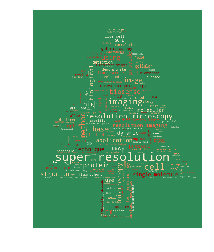

In [15]:
cloud = WordCloud(background_color='SEAGREEN', mask=mask, colormap='OrRd').generate(text)
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [16]:
cloud.to_file(os.path.join(currdir, "wc.png"))

In [8]:
papers["PubmedArticle"][0]["MedlineCitation"]["Article"]["Abstract"]['AbstractText'][0]

StringElement('Unbiased screening studies have repeatedly identified actin-related proteins as one of the families of proteins most influenced by neurotrauma. Nevertheless, the status quo model of cytoskeletal reorganization after neurotrauma excludes actin and incorporates only changes in microtubules and intermediate filaments. Actin is excluded in part because it is difficult to image with conventional techniques. However, recent innovations in fluorescent microscopy provide an opportunity to image the actin cytoskeleton at super-resolution resolution in living cells. This study applied these innovations to an in vitro model of neurotrauma.', attributes={'Label': 'BACKGROUND', 'NlmCategory': 'BACKGROUND'})

In [33]:
?WordCloud